In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from Bio.Seq import Seq
from transformers import TFBertModel, BertTokenizer,BertConfig
import re
import pickle
import sys
import gc
import os
import shutil
import glob
from imblearn.over_sampling import SMOTE, SMOTENC, BorderlineSMOTE
import math
import random

# np.random.seed(42)
# tf.random.set_seed(42)
# os.environ['PYTHONHASHSEED']=str(42)
tf.keras.utils.set_random_seed(42)

In [2]:
# import the embeddings from each folder in full. Train test split each dataset with random seed 42 (I hope it will work) and keep only the X_test. 

# Loading Diseases

In [3]:
hiv_average_embeddings = [[None] * 1024]

In [4]:
number_param_hiv = 5
for i in range(number_param_hiv):
    with open("hiv_binary_embeddings/hiv_" + str(i) + ".pkl", "rb") as f:
        hiv_temp = pickle.load(f)
        hiv_average_embeddings = np.concatenate((hiv_average_embeddings, hiv_temp))
    f.close()

hiv_average_embeddings = np.delete(hiv_average_embeddings, 0, 0)

In [5]:
covid_average_embeddings = [[None] * 1024]

In [6]:
number_param_covid = 4
for i in range(number_param_covid):
    with open("covid_binary_embeddings/covid_" + str(i) + ".pkl", "rb") as f:
        covid_temp = pickle.load(f)
        covid_average_embeddings = np.concatenate((covid_average_embeddings, covid_temp))
    f.close()

covid_average_embeddings = np.delete(covid_average_embeddings, 0, 0)

In [7]:
influenza_average_embeddings = [[None] * 1024]

In [8]:
number_param_influenza = 1
for i in range(number_param_influenza):
    with open("influenza_binary_embeddings/influenza_" + str(i) + ".pkl", "rb") as f:
        influenza_temp = pickle.load(f)
        influenza_average_embeddings = np.concatenate((influenza_average_embeddings, influenza_temp))
    f.close()

influenza_average_embeddings = np.delete(influenza_average_embeddings, 0, 0)

In [9]:
dengue_average_embeddings = [[None] * 1024]

In [10]:
number_param_dengue = 1
for i in range(number_param_dengue):
    with open("dengue_binary_embeddings/dengue_" + str(i) + ".pkl", "rb") as f:
        dengue_temp = pickle.load(f)
        dengue_average_embeddings = np.concatenate((dengue_average_embeddings, dengue_temp))
    f.close()

dengue_average_embeddings = np.delete(dengue_average_embeddings, 0, 0)

In [11]:
cll_average_embeddings = [[None] * 1024]

In [12]:
number_param_cll = 1
for i in range(number_param_cll):
    with open("cll_binary_embeddings/cll_" + str(i) + ".pkl", "rb") as f:
        cll_temp = pickle.load(f)
        cll_average_embeddings = np.concatenate((cll_average_embeddings, cll_temp))
    f.close()

cll_average_embeddings = np.delete(cll_average_embeddings, 0, 0)

# Loading Healthy

In [13]:
healthy_average_embeddings = [[None] * 1024]

In [14]:
number_param_healthy = 14
for i in range(number_param_healthy):
    with open("hiv_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
        healthy_temp = pickle.load(f)
        healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
    f.close()

healthy_average_embeddings = np.delete(healthy_average_embeddings, 0, 0)

In [15]:
# number_param_healthy = 13
# for i in range(number_param_healthy):
#     with open("covid_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
#         healthy_temp = pickle.load(f)
#         healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
#     f.close()

# healthy_average_embeddings_covid = np.delete(healthy_average_embeddings, 0, 0)

In [16]:
# number_param_healthy = 2
# for i in range(number_param_healthy):
#     with open("influenza_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
#         healthy_temp = pickle.load(f)
#         healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
#     f.close()

# healthy_average_embeddings_influenza = np.delete(healthy_average_embeddings, 0, 0)

In [17]:
# number_param_healthy = 1
# for i in range(number_param_healthy):
#     with open("dengue_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
#         healthy_temp = pickle.load(f)
#         healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
#     f.close()

# healthy_average_embeddings_dengue = np.delete(healthy_average_embeddings, 0, 0)

In [18]:
# number_param_healthy = 1
# for i in range(number_param_healthy):
#     with open("cll_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
#         healthy_temp = pickle.load(f)
#         healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
#     f.close()

# healthy_average_embeddings_cll = np.delete(healthy_average_embeddings, 0, 0)

In [19]:
print(healthy_average_embeddings.shape)

(41000, 1024)


# Train Test Splits

In [20]:
X = np.concatenate((hiv_average_embeddings[:3000], covid_average_embeddings[:3000], influenza_average_embeddings, dengue_average_embeddings, cll_average_embeddings))
y = np.concatenate(([0] * 3000, [1] * 3000, [2] * len(influenza_average_embeddings), [3] * len(dengue_average_embeddings), [4] * len(cll_average_embeddings)))
X = np.asarray(X).astype('float32')
print(X.shape)
print(y.shape)
# print(X_test.shape)
# print(y_test.shape)

(7710, 1024)
(7710,)


In [21]:
sm = BorderlineSMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
print(X.shape)
print(len([i for i in y if i == 0]))
print(len([i for i in y if i == 1]))
print(len([i for i in y if i == 2]))

(15000, 1024)
3000
3000
3000


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [23]:
del X
del y
gc.collect()

0

In [24]:
print(X_train[0])

[-0.06743167 -0.01081656  0.00898171 ... -0.00855886  0.01558698
 -0.04422623]


In [25]:
print(y_train[0])

3


In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(1024),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(784, activation='relu'),
  tf.keras.layers.Dropout(0.3, seed=42),
  tf.keras.layers.Dense(512, activation='relu'),
  # tf.keras.layers.Dense(384, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5, seed=42),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  # tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  # tf.keras.layers.Dense(8, activation='relu'),
  # tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(1024,)),
#   tf.keras.layers.Dense(1024, activation='relu'),
#   tf.keras.layers.Dense(512, activation='relu'),
#   tf.keras.layers.Dropout(0.5, seed=42),
#   tf.keras.layers.Dense(256, activation='relu'),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.5, seed=42),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(16, activation='relu'),
#   # tf.keras.layers.Dense(8, activation='relu'),
#   # tf.keras.layers.Dense(4, activation='relu'),
#   tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model.summary()

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-01-29 21:37:21.169648: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-29 21:37:21.169792: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 784)               803600    
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               3

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [28]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=150,
    mode='auto',
    restore_best_weights=True,
)

In [29]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="multi_class_general_weights/",
                                                 save_weights_only=True,
                                                 verbose=1)

In [30]:
history = model.fit(X_train, y_train, epochs=1000, validation_data = (X_val, y_val), callbacks=[es])

Epoch 1/1000


2023-01-29 21:37:21.662685: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-29 21:37:21.986537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


380/380 [==============================] - ETA: 0s - loss: 0.8197 - accuracy: 0.6002

2023-01-29 21:37:27.448873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


380/380 [==============================] - 6s 13ms/step - loss: 0.8197 - accuracy: 0.6002 - val_loss: 0.5886 - val_accuracy: 0.7237
Epoch 2/1000
380/380 [==============================] - 4s 12ms/step - loss: 0.5281 - accuracy: 0.7538 - val_loss: 0.4641 - val_accuracy: 0.7978
Epoch 3/1000
380/380 [==============================] - 5s 12ms/step - loss: 0.4650 - accuracy: 0.7985 - val_loss: 0.4469 - val_accuracy: 0.8059
Epoch 4/1000
380/380 [==============================] - 4s 11ms/step - loss: 0.4243 - accuracy: 0.8229 - val_loss: 0.4281 - val_accuracy: 0.8163
Epoch 5/1000
380/380 [==============================] - 4s 12ms/step - loss: 0.3732 - accuracy: 0.8409 - val_loss: 0.3964 - val_accuracy: 0.8356
Epoch 6/1000
380/380 [==============================] - 4s 12ms/step - loss: 0.3518 - accuracy: 0.8500 - val_loss: 0.3695 - val_accuracy: 0.8326
Epoch 7/1000
380/380 [==============================] - 5s 12ms/step - loss: 0.3216 - accuracy: 0.8622 - val_loss: 0.3922 - val_accuracy: 0.828

In [38]:
with open('multi_class_general_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

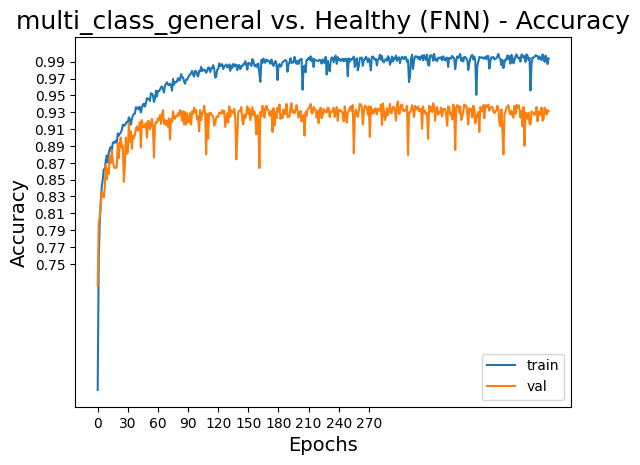

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('multi_class_general vs. Healthy (FNN) - Accuracy', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.yticks(np.arange(0.75, 1.0, 0.02))
plt.xticks(np.arange(0, 280, 30.0))
plt.legend(['train', 'val'], loc='lower right')
plt.show()

## Model 3 Testing

In [40]:
model.save("multi_class_general_model.h5")

In [46]:
model.evaluate(X_test, y_test)

16/47 [=========>....................] - ETA: 0s - loss: 0.5462 - accuracy: 0.9375

2023-01-29 22:17:25.784934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 0s 7ms/step - loss: 0.4701 - accuracy: 0.9493


[0.470129132270813, 0.9493333101272583]

In [45]:
model = tf.keras.models.load_model("multi_class_general_model.h5")

In [47]:
y_pred = []
y_true = y_test

for i in X_test:
    i = np.expand_dims(i, axis=0)
    y_pred.append(np.argmax(model.predict(i)))

y_pred

1/1 [==============================] - 0s 14ms/step


2023-01-29 22:17:27.339279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 15ms/step


[3,
 2,
 4,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 4,
 2,
 2,
 2,
 2,
 3,
 4,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 3,
 0,
 0,
 1,
 2,
 3,
 2,
 0,
 0,
 4,
 2,
 3,
 2,
 3,
 2,
 4,
 4,
 0,
 3,
 0,
 1,
 4,
 0,
 0,
 4,
 3,
 0,
 3,
 3,
 4,
 4,
 1,
 0,
 4,
 3,
 2,
 2,
 2,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 4,
 2,
 1,
 1,
 0,
 0,
 4,
 0,
 1,
 0,
 1,
 3,
 0,
 1,
 4,
 4,
 3,
 2,
 4,
 2,
 1,
 3,
 2,
 4,
 0,
 1,
 3,
 0,
 0,
 4,
 3,
 0,
 4,
 4,
 2,
 1,
 0,
 1,
 4,
 1,
 0,
 4,
 1,
 3,
 1,
 4,
 4,
 1,
 4,
 4,
 2,
 4,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 3,
 1,
 1,
 1,
 0,
 0,
 1,
 4,
 1,
 4,
 1,
 0,
 4,
 0,
 4,
 1,
 4,
 0,
 0,
 4,
 0,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 4,
 4,
 0,
 0,
 4,
 0,
 1,
 3,
 2,
 2,
 2,
 4,
 0,
 3,
 0,
 1,
 1,
 4,
 4,
 2,
 2,
 3,
 1,
 4,
 3,
 3,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 0,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 4,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 0,
 3,
 0,
 1,
 4,
 3,
 4,
 0,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 0,
 0,
 0,
 0,
 1,
 4,
 4,
 1,
 4,
 4,
 1,
 3,
 4,


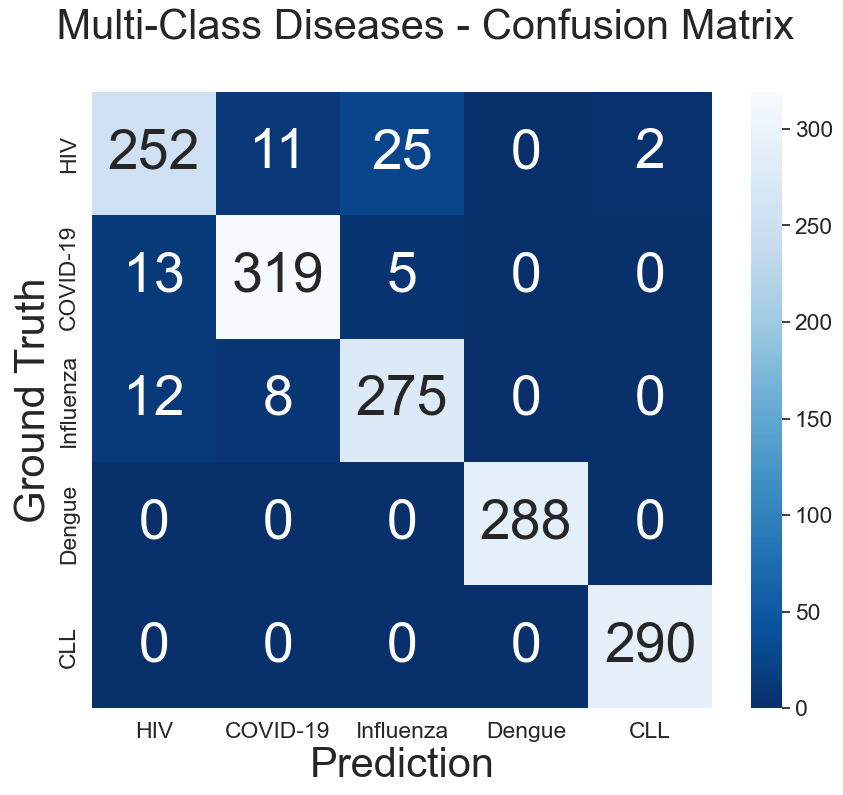

tf.Tensor(
[[252  11  25   0   2]
 [ 13 319   5   0   0]
 [ 12   8 275   0   0]
 [  0   0   0 288   0]
 [  0   0   0   0 290]], shape=(5, 5), dtype=int32)


: 

In [52]:
correct_labels = np.array(tf.concat([item for item in y_true], axis = 0))
predicted_labels = np.array(tf.concat([item for item in y_pred], axis = 0))

confusion_mtx = tf.math.confusion_matrix(correct_labels, predicted_labels)
plt.figure(figsize=(10, 8))
plt.title('    Multi-Class Diseases - Confusion Matrix\n', fontsize=30)
sns.set(font_scale=1.5)

cmap = sns.color_palette("Blues_r", as_cmap=True)

sns.heatmap(confusion_mtx,
            xticklabels=["HIV", "COVID-19", "Influenza", "Dengue", "CLL"],
            yticklabels=["HIV", "COVID-19", "Influenza", "Dengue", "CLL"],
            annot=True, fmt='g', annot_kws={"size":40}, cmap=cmap)
plt.xlabel('Prediction', fontsize=30)
plt.ylabel('Ground Truth', fontsize=30)
plt.show()

print(confusion_mtx)

In [49]:
tf.math.confusion_matrix([0, 0, 0, 0, 0], [1, 1, 1, 1, 1]) # represents # of false positives (0 actual 1 pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 5],
       [0, 0]], dtype=int32)>